# 3 - Telco Customer Churn: Neural Network
## Predictive Neural Network
### Alden Chico

---

## Premise - How Neural Networks Work

We observed that random forest classification on the complete feature dataset was able to achieve 60% F1 on 80% total accuracy. We will keep this best performing model in mind when using deep learning to train and predict a neural network on the Telco data.

The best point to start discussion on neural networks is discussing how biological neurons work. Biological neurons consist of dendrites, the nucleus, and the axon. Dendrites send electrical signals to the nucleus based on information that the nervous system gathers from the rest of the body. The nucleus activates the signals gathered from the dendrites and sends an output signal to the axon on how the brain wants to respond . The brain gathers information from the rest of the body about what's going on inside and outside the body and adjusts the dendrites neural input based on new information being gathered.

<figure>
<img src="reference/4-NN/neuron.png" alt="Neuron" class="center">
<figcaption><center><b>Neuron Diagram</b></center></figcaption>
</figure> 

A neural network in computer programming aims to simulate the functions of our biological neurons. How a neural network works is that it feeds input to the network in the form of a vector that represents a single observation. The input vector acts as the dendrites that gather signals from the outside world for the neural network to process. The vector is then multiplied by weighted values that represent the strength of the signal and added together through the neuron. The neuron of a neural network activates the summed signal via an activation function that limits the value of the output in order to ensure a stable system. After interpreting a set number of observations, the neural network corrects the weighted values so that subsequent predictions are closer to their desired value. This process of self-correction is known as back propagation which lets the neural network make better guesses as the number of observations increases.

<figure>
<img src="reference/4-NN/neural_network.png" alt="Neural Network" class="center" style=width:590px;height:306;>
<figcaption><center><b>Neuron Network Diagram</b></center></figcaption>
</figure> 

For the Telco customer churn dataset, the neural network looks at how factors like service pricing, gender, and age all interact with one another. The stronger the relationship is between given factors, the greater the signal weight. For a neural network, the output of the input layer can feed into the input of another neural layer to record more complex relationships between different combinations of features. These are called hidden layers. For example, instead of looking at how pricing and gender interact independently from one another, a deeper neural model can observe how the combination of gender and pricing effect the services that the user is subscribed to. Deeper neural models allow for more complex relationships between features which ultimately leads to less bias in the model. To reduce model variance, the neural network needs many observations to generalize the model to the greater population.

For this part of the project, we are going to model the data on different neural architectures and observe how increasing the complexity of the model affects predictive performance on the holdout dataset.

---

## Import Data

As always, the first step in modeling data is importing it. The Telco dataset has been stored in CSV files that can be retrieved using the Pandas library.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import the Telco churn dataset with selected OHE features from CSV file
data = pd.read_csv('output/2-EDA/clean_telco.csv')
data = data.drop(['Unnamed: 0', 'customerID'], axis=1)

# Import the Telco churn dataset with selected OHE features from CSV file
data_all = pd.read_csv('output/2-EDA/all_features_telco.csv')
data_all = data_all.drop(['Unnamed: 0', 'customerID'], axis=1)

In [3]:
# Save all the predictors/target columns as numpy arrays for Keras
y = data['churn']
predictors = data.drop(['churn'], axis=1).values
n_cols = predictors.shape[1]

y_all = data_all['churn']
predictors_all = data_all.drop(['churn'], axis=1).values
n_cols_all = predictors_all.shape[1]

print(f'No. of columns in selected OHE column Dataset: {n_cols}')
print(f'No. of columns in non-selected OHE column Dataset: {n_cols_all}')

No. of columns in selected OHE column Dataset: 13
No. of columns in non-selected OHE column Dataset: 46


---

## Create Helper Functions to Create Neural Network

The following functions allow us to build and adjust the neural network using sequential dense layers. Dense neural layers are neural layers whos input is the output of every neuron in the layer before it. Every neuron records different relationships from the neural layer before it, so having more neurons at each layer can record more relationships from the layer before it. 

<figure>
<img src="reference/4-NN/dense_layer.png" alt="Neuron" class="center">
<figcaption><center><b>Dense Layer</b></center></figcaption>
</figure> 

The baseline neural network consists of the single input layer that takes a single observation and feeds the values to a dense layer with a specified number of neurons. The output of the neural layer is then activated using the Rectified Linear Unit (ReLU) function whose value is 0 if the output is negative and the value itself if the output is positive. In practice, the ReLU function maintains great stability through deep neural networks so the output makes sense after each run through.

The final layer of the model is a single neuron activated by a sigmoid function. The sigmoid function limits the output of the neural network between 0 and 1. Any value for the output less than 0.5 is considered a label of the negative class (the user didn't churn) and output greater than 0.5 is considered a label of the positive class (the user churned).

<figure>
<img src="reference/4-NN/relu_sigmoid.png" alt="ReLU and Sigmoid" class="center">
<figcaption><center><b>Activation Functions</b></center></figcaption>
</figure> 

Lastly, compiling the neural network establishes the optimizer and loss function used for the classification task. For neural networks, there are two commonly used optimizers - stochastic gradient descent and Adam. Optimizers determine the learning rate at which the neural network adjusts the training weights. Adam optimizer adapts the learning rate of the neural network on every forward and backward pass through the network while stochastic gradient descent's learning rate is established before training the network. We will use the Adam optimizer exclusively since it works well and is efficient at optimizing the neural network automatically.

The loss function is how the network determines how close the prediction is to the desired output. For binary classification, the loss function is called binary cross entropy. Because the sigmoid activation function limits the output of the network between 0 and 1, the binary cross entropy function looks at how far the prediction is off from the known 0 or 1 labels to determine the total loss from the neural network. The loss propagates through the entire network in the backward pass and changes the model's weights to move closer towards the desired value.

The functions below allow us to create the input layer, add however many hidden layers we want, and compile the model using binary cross entropy loss and adam optimizer. Since the output is between 0 and 1, the ```activate_output``` function classifies all values under 0.5 as the user not churning while all values above 0.5 as the user churning.

In [4]:
# Baseline neural network layer
from keras.layers import Dense
from keras.models import Sequential
def create_baseline_model(n_units, n_cols):
    model = Sequential()
    model.add(Dense(n_units, activation='relu', input_shape=(n_cols, )))
    return model

Using TensorFlow backend.


In [5]:
# Adds fully connected layers with specified amount of neurons
def add_model_layers(model, neuron_list):
    for neuron in neuron_list:
        model.add(Dense(neuron, activation='relu'))

In [6]:
# Adds the final model layer and compiles
def finish_model(model):
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Activates output to prediction since sigmoid output is between 0 and 1
def activate_output(y_pred):
    activ_y = []
    for y in y_pred:
        if y < 0.5:
            activ_y.append(0)
        else:
            activ_y.append(1)
    return activ_y

---

## Results Function

The results function here displays the classification report and confusion matrix between data predictions and their true values. Plot results will show us how the model performs against the holdout dataset.

In [8]:
# Function that plots confusion matrix / classification report after making predictions
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def plot_results(y_test, y_pred, output_dict=False):
    cr = classification_report(y_test, y_pred, output_dict=output_dict)
    # Display results if plot_results doesn't want to return classification report
    if output_dict == False:
        conf_mat = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(conf_mat, index = ['Did Not Churn', 'Churn'],
                          columns = ['Did Not Churn', 'Churn'])
        _ = sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
        _ = plt.title('Churn Confusion Matrix', fontsize=20)
        _ = plt.ylabel('True', fontsize=14)
        _ = plt.xlabel('Predicted', fontsize=14)
        _ = plt.show()
        print(cr)
    # Only return classification report if desire dictionary results
    return cr

---

## Create and Plot F1-Scores for User Churn to Evaluate Model

```plot_f1_acc``` creates four separate plots that allow us to visualize how every model performs against one another. We're going to look at model performance against the selected and non-selected feature datasets and build line plots for F1-score and accuracy.

In [9]:
f1_dict_all = {}
acc_dict_all = {}

f1_dict_clean = {}
acc_dict_clean = {}

In [10]:
# Plot the change in F1-scores over the different NN models
def plot_f1_acc(f1_dict, acc_dict, f1_dict_clean, acc_dict_clean):
    
    fig, axs = plt.subplots(2, 2, figsize=(20,10))
    
    # Gather f1_dict values and keys from all dataset
    list_val = list(f1_dict.values())
    list_keys = list(f1_dict.keys())
    avg_f1_score = np.mean(list_val)
    
    # Gather acc_dict values and keys from all dataset
    list_acc = list(acc_dict.values())
    list_acc_keys = list(acc_dict.keys())
    avg_acc_score = np.mean(list_acc)
    
    # Gather f1_dict values and keys from all dataset
    list_val_clean = list(f1_dict_clean.values())
    list_keys_clean = list(f1_dict_clean.keys())
    avg_f1_score_clean = np.mean(list_val_clean)
    
    # Gather acc_dict values and keys from all dataset
    list_acc_clean = list(acc_dict_clean.values())
    list_acc_keys_clean = list(acc_dict_clean.keys())
    avg_acc_score_clean = np.mean(list_acc_clean)
    
    # Plot F1 Scores for All Dataset
    _ = axs[0][0].plot(list_val, marker='o', color='black', linestyle='solid', 
                 linewidth='2', label='Churn Prediction F1-Score')
    _ = axs[0][0].axhline(avg_f1_score, color='red', linestyle='dashed', label=f'Average F1-Score : {avg_f1_score:.2f}')
    _ = axs[0][0].set_title('F1-Score for Models on Non-Selected Variable Dataset', fontsize=14, fontweight='bold')
    _ = axs[0][0].set_xticks(range(len(list_val)))
    _ = axs[0][0].set_xticklabels(list_keys, rotation=60)
    _ = axs[0][0].set_xlabel('Model Description')
    _ = axs[0][0].set_ylabel('F1-Score')
    _ = axs[0][0].legend(loc='lower right')
    
    
    # Plot Accuracy Scores for All Dataset
    _ = axs[0][1].plot(list_acc, marker='o', color='black', linestyle='solid', 
                 linewidth='2', label='Accuracy')
    _ = axs[0][1].axhline(avg_acc_score, color='red', linestyle='dashed', label=f'Average Accuracy : {avg_acc_score:.2f}')
    _ = axs[0][1].set_title('Accuracy for Models on Non-Selected Variable Dataset', fontsize=14, fontweight='bold')
    _ = axs[0][1].set_xticks(range(len(list_acc)))
    _ = axs[0][1].set_xticklabels(list_acc_keys, rotation=60)
    _ = axs[0][1].set_xlabel('Model Description')
    _ = axs[0][1].set_ylabel('Accuracy')
    _ = axs[0][1].legend(loc='lower right')
    
    # Plot F1 Scores for Clean Dataset
    _ = axs[1][0].plot(list_val_clean, marker='o', color='black', linestyle='solid', 
                 linewidth='2', label='Churn Prediction F1-Score')
    _ = axs[1][0].axhline(avg_f1_score_clean, color='red', linestyle='dashed', 
                          label=f'Average F1-Score : {avg_f1_score_clean:.2f}')
    _ = axs[1][0].set_title('F1-Score for Models on Selected Variable Dataset', fontsize=14, fontweight='bold')
    _ = axs[1][0].set_xticks(range(len(list_val_clean)))
    _ = axs[1][0].set_xticklabels(list_keys_clean, rotation=60)
    _ = axs[1][0].set_xlabel('Model Description')
    _ = axs[1][0].set_ylabel('F1-Score')
    _ = axs[1][0].legend(loc='lower right')
    
    
    # Plot Accuracy Scores for Clean Dataset
    _ = axs[1][1].plot(list_acc_clean, marker='o', color='black', linestyle='solid', 
                 linewidth='2', label='Accuracy')
    _ = axs[1][1].axhline(avg_acc_score_clean, color='red', linestyle='dashed', 
                          label=f'Average Accuracy : {avg_acc_score_clean:.2f}')
    _ = axs[1][1].set_title('Accuracy for Models on Selected Variable Dataset', fontsize=14, fontweight='bold')
    _ = axs[1][1].set_xticks(range(len(list_acc_clean)))
    _ = axs[1][1].set_xticklabels(list_acc_keys_clean, rotation=60)
    _ = axs[1][1].set_xlabel('Model Description')
    _ = axs[1][1].set_ylabel('Accuracy')
    _ = axs[1][1].legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()

---

## Train-Test Split on Datasets

We will use 80% of the data to train the model and 20% of the data to predict. The ```StratifiedShuffleSplit``` function splits the datasets using the distribution of users that churned and didn't churn in the sample dataset. Using a stratified shuffle split ensures random selection of the dataset to generate training and testing data while ensuring that the ratio between users that churned and didn't churn is consistent with the population.

In [11]:
# Stratify training and testing data according to distribution of total sample
from sklearn.model_selection import StratifiedShuffleSplit

sss_clean = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss_clean.split(predictors, y):
    X_train, X_test = np.array(predictors[train_index]), np.array(predictors[test_index])
    y_train, y_test = np.array(y[train_index]), np.array(y[test_index])

sss_all = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss_clean.split(predictors_all, y_all):
    X_train_all, X_test_all = np.array(predictors_all[train_index]), np.array(predictors_all[test_index])
    y_train_all, y_test_all = np.array(y_all[train_index]), np.array(y_all[test_index])
    

print(f'Selected Feature Dataset Shape\nX_train:{X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')
print(f'\nNon-Selected Feature Dataset Shape\nX_train:{X_train_all.shape}\nX_test: {X_test_all.shape}\ny_train: {y_train_all.shape}\ny_test: {y_test_all.shape}')

Selected Feature Dataset Shape
X_train:(5634, 13)
X_test: (1409, 13)
y_train: (5634,)
y_test: (1409,)

Non-Selected Feature Dataset Shape
X_train:(5634, 46)
X_test: (1409, 46)
y_train: (5634,)
y_test: (1409,)


---

## Evaluating the Baseline Model

A good starting point for using a neural network to model the data is looking at how the input layer activates the output by itself. The baseline model uses a single input layer with the same number of neurons as the number of features used to predict the outcome. The input layer is then activated by the output layer and used to predict whether or not the user churned or didn't churn. The baseline neural network only looks at simple interactions between the Telco features like user gender, age, and services subscribed. 

Just as we stratified the train-test split, ```StratifiedKFold``` splits the training dataset into 5-Folds with close to the same distribution as the population.

The process of training and evaluating the model is as follows:
1. Define the model architecture.

2. Fit the model using training folds from the StratifiedKFold.

3. Evaluate the model using the test fold.

4. Print the average and standard deviation of model accuracy.

The final model evaluation metrics are found by:
1. Defining the model architecture.

2. Fitting the model on all training data.

3. Predicting the labels of unseen data using the trained model.

4. Printing the classification report, confusion matrix, and F1/accuracy plots.

Below demonstrates this process on the non-selected and selected feature datasets.

In [12]:
# Performs 5-Fold CV on the clean dataset using the baseline model
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores=[]
for train, test in kfold.split(X_train, y_train):
    # Model Architecture
    model = create_baseline_model(n_units=n_cols, n_cols=n_cols)
    _ = finish_model(model)
    
    model.fit(X_train[train], y_train[train], epochs=10, batch_size=10, verbose=False)
    scores = model.evaluate(X_train[test], y_train[test], verbose=False)
    print(f"Accuracy on Clean Dataset: {scores[1]*100:.2f}%")
    cv_scores.append(scores[1] * 100)
print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Accuracy on Clean Dataset: 77.46%
Accuracy on Clean Dataset: 74.71%
Accuracy on Clean Dataset: 78.97%
Accuracy on Clean Dataset: 80.30%
Accuracy on Clean Dataset: 79.22%
78.13% (+/- 1.94%)


In [13]:
# Performs 5-Fold CV on the non-selected feature dataset using the baseline model
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores=[]
for train, test in kfold.split(X_train_all, y_train_all):
    # Model Architecture
    model = create_baseline_model(n_units=n_cols_all, n_cols=n_cols_all)
    _ = finish_model(model)
    
    model.fit(X_train_all[train], y_train_all[train], epochs=10, batch_size=10, verbose=False)
    scores = model.evaluate(X_train_all[test], y_train_all[test], verbose=False)
    print(f"Accuracy on Non-Selected Feature Dataset {scores[1]*100:.2f}%")
    cv_scores.append(scores[1] * 100)
print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")

Accuracy on Non-Selected Feature Dataset 80.21%
Accuracy on Non-Selected Feature Dataset 77.82%
Accuracy on Non-Selected Feature Dataset 79.24%
Accuracy on Non-Selected Feature Dataset 76.13%
Accuracy on Non-Selected Feature Dataset 79.40%
78.56% (+/- 1.44%)


Confusion Matrix for Selected Feature Dataset


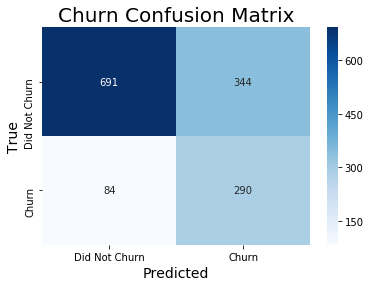

              precision    recall  f1-score   support

           0       0.89      0.67      0.76      1035
           1       0.46      0.78      0.58       374

    accuracy                           0.70      1409
   macro avg       0.67      0.72      0.67      1409
weighted avg       0.78      0.70      0.71      1409

Confusion Matrix for Non-Selected Feature Dataset


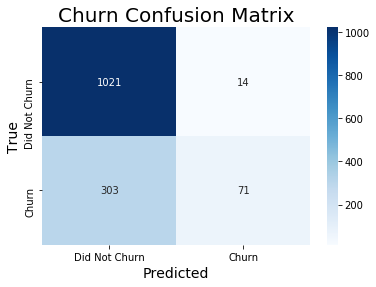

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1035
           1       0.84      0.19      0.31       374

    accuracy                           0.78      1409
   macro avg       0.80      0.59      0.59      1409
weighted avg       0.79      0.78      0.72      1409



In [14]:
# Train on all training data and predict on hold-out set

# Fit baseline model to selected feature training data
model = create_baseline_model(n_units=n_cols, n_cols=n_cols)
_ = finish_model(model)
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=False)

# Fit baseline model to non-selected feature training data
model_all = create_baseline_model(n_units=n_cols_all, n_cols=n_cols_all)
_ = finish_model(model_all)
model_all.fit(X_train_all, y_train_all, epochs=10, batch_size=10, verbose=False)

# Make predictions on testing data and print classification report
y_pred_base = activate_output(model.predict(X_test))
print('Confusion Matrix for Selected Feature Dataset')
_ = plot_results(y_test, y_pred_base)
cr_base_clean = plot_results(y_test, y_pred_base, output_dict=True)

y_pred_base_all = activate_output(model_all.predict(X_test_all))
print('Confusion Matrix for Non-Selected Feature Dataset')
_ = plot_results(y_test_all, y_pred_base_all)
cr_base_all = plot_results(y_test_all, y_pred_base_all, output_dict=True)

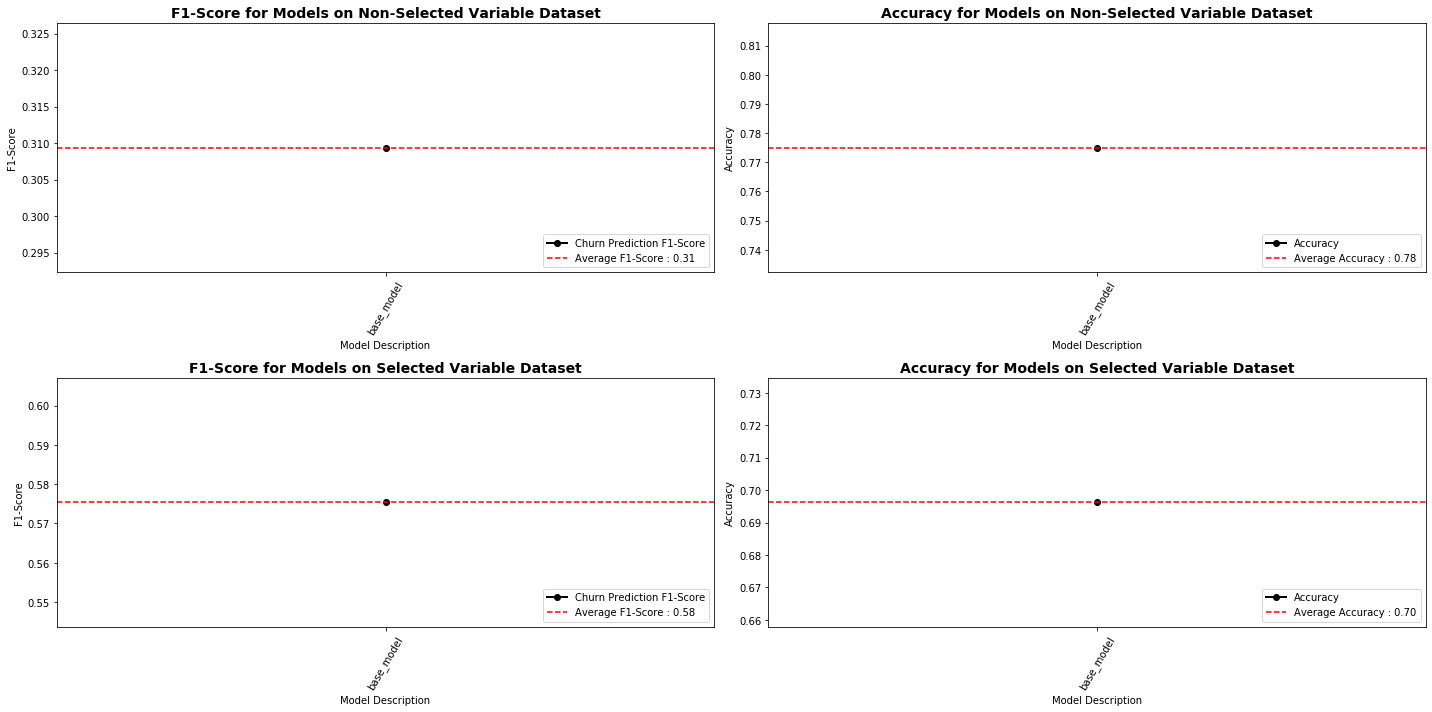

In [15]:
# Plot baseline model results
f1_dict_all['base_model'] = cr_base_all['1']['f1-score']
acc_dict_all['base_model'] = cr_base_all['accuracy']
f1_dict_clean['base_model'] = cr_base_clean['1']['f1-score']
acc_dict_clean['base_model'] = cr_base_clean['accuracy']
_ = plot_f1_acc(f1_dict_all, acc_dict_all, f1_dict_clean, acc_dict_clean)

What's of particular note with the baseline neural network model is how poorly the non-selected feature variable dataset was able to recall users that churned from the holdout dataset. The neural network was only able to find 71 users that churned from the 374 users that actually did. Having low recall means that if Telco were to incentivize users who are at risk of churning to stay with the Telco services, the baseline neural network model wouldn't suggest people who are actually going to churn all that well. Although the overall accuracy of the baseline model is comparable to that of the random forest classifier, it's not going to be of much help if we're going to use the model to entice users who are at risk of leaving Telco.

---

## Using More Hidden Layers

The next logical step in evaluating a neural network model is adding more hidden layers. More hidden layers will be able to explain more nuanced relationships from the features provided to the neural network. Here, we will add three hidden layers to explain more complex interactions between the data from layer to layer.

In [16]:
# Performs 5-Fold CV on the selected feature dataset using a 3 hidden layer model
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores= []

# Add 3 hidden layers with n_cols number of neurons
neurons = [n_cols, n_cols, n_cols]
for train, test in kfold.split(X_train, y_train):
    # Model architecture
    model = create_baseline_model(n_units=n_cols, n_cols=n_cols)
    _ = add_model_layers(model, neurons)
    _ = finish_model(model)
    
    # Model Evaluation
    model.fit(X_train[train], y_train[train], epochs=10, batch_size=10, verbose=False)
    scores = model.evaluate(X_train[test], y_train[test], verbose=False)
    print(f"Accuracy on Selected Feature Dataset: {scores[1]*100:.2f}%")
    cv_scores.append(scores[1] * 100)
    
# Average model performance
print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")

Accuracy on Selected Feature Dataset: 75.51%
Accuracy on Selected Feature Dataset: 77.55%
Accuracy on Selected Feature Dataset: 78.97%
Accuracy on Selected Feature Dataset: 79.68%
Accuracy on Selected Feature Dataset: 78.69%
78.08% (+/- 1.46%)


In [17]:
# Performs 5-Fold CV on the non-selected feature dataset using the 3 hidden layer model
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores=[]

neurons = [n_cols_all, n_cols_all, n_cols_all]
for train, test in kfold.split(X_train_all, y_train_all):
    # Model Architecture
    model = create_baseline_model(n_units=n_cols_all, n_cols=n_cols_all)
    _ = add_model_layers(model, neurons)
    _ = finish_model(model)
    
    model.fit(X_train_all[train], y_train_all[train], epochs=10, batch_size=10, verbose=False)
    scores = model.evaluate(X_train_all[test], y_train_all[test], verbose=False)
    print(f"Accuracy on Non-Selected Feature Dataset {scores[1]*100:.2f}%")
    cv_scores.append(scores[1] * 100)
print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")

Accuracy on Non-Selected Feature Dataset 77.64%
Accuracy on Non-Selected Feature Dataset 77.82%
Accuracy on Non-Selected Feature Dataset 79.24%
Accuracy on Non-Selected Feature Dataset 79.06%
Accuracy on Non-Selected Feature Dataset 79.31%
78.61% (+/- 0.73%)


Confusion Matrix for Selected Feature Dataset


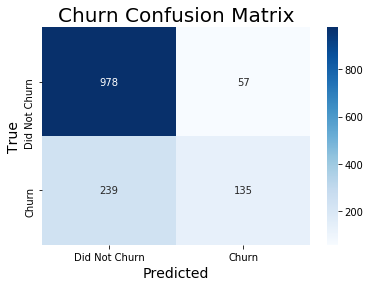

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1035
           1       0.70      0.36      0.48       374

    accuracy                           0.79      1409
   macro avg       0.75      0.65      0.67      1409
weighted avg       0.78      0.79      0.76      1409

Confusion Matrix for Non-Selected Feature Dataset


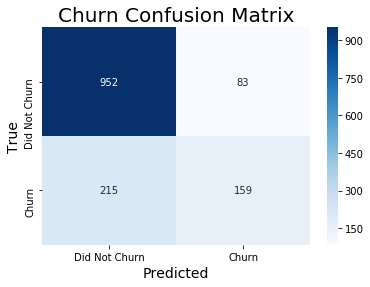

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1035
           1       0.66      0.43      0.52       374

    accuracy                           0.79      1409
   macro avg       0.74      0.67      0.69      1409
weighted avg       0.77      0.79      0.77      1409



In [18]:
# Train on all training data and predict on hold-out set

# Fit 3 hidden layer model to all selected feature training data
neurons = [n_cols, n_cols, n_cols]
model = create_baseline_model(n_units=n_cols, n_cols=n_cols)
_ = add_model_layers(model, neurons)
_ = finish_model(model)
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=False)

# Fit 3 hidden layer model to all non-selected feature training data
neurons = [n_cols_all, n_cols_all, n_cols_all]
model_all = create_baseline_model(n_units=n_cols_all, n_cols=n_cols_all)
_ = add_model_layers(model_all, neurons)
_ = finish_model(model_all)
model_all.fit(X_train_all, y_train_all, epochs=10, batch_size=10, verbose=False)

# Make predictions on testing data and print classification report
y_pred_deep_clean = activate_output(model.predict(X_test))
print('Confusion Matrix for Selected Feature Dataset')
_ = plot_results(y_test, y_pred_deep_clean)
cr_deep_clean = plot_results(y_test, y_pred_deep_clean, output_dict=True)

y_pred_deep_all = activate_output(model_all.predict(X_test_all))
print('Confusion Matrix for Non-Selected Feature Dataset')
_ = plot_results(y_test_all, y_pred_deep_all)
cr_deep_all = plot_results(y_test_all, y_pred_deep_all, output_dict=True)

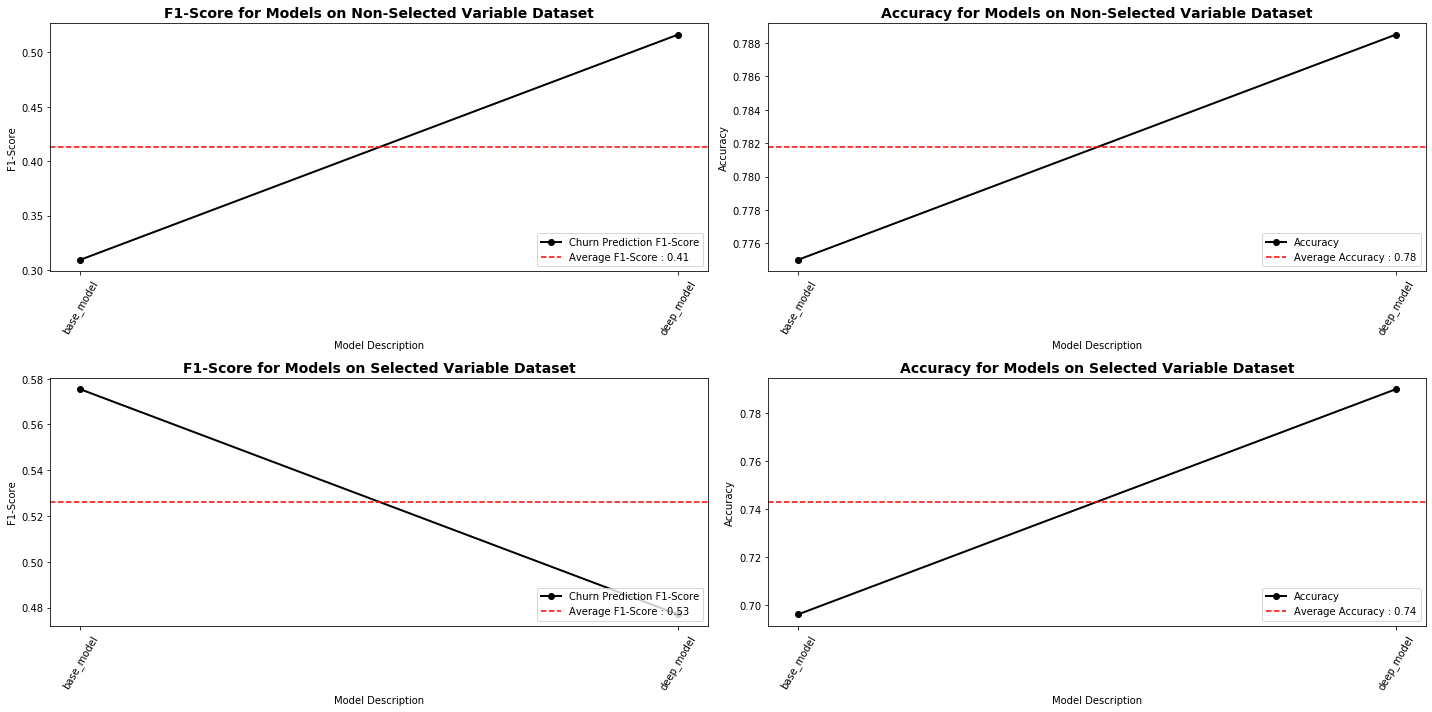

In [19]:
# Plot deep model
f1_dict_all['deep_model'] = cr_deep_all['1']['f1-score']
acc_dict_all['deep_model'] = cr_deep_all['accuracy']
f1_dict_clean['deep_model'] = cr_deep_clean['1']['f1-score']
acc_dict_clean['deep_model'] = cr_deep_clean['accuracy']
_ = plot_f1_acc(f1_dict_all, acc_dict_all, f1_dict_clean, acc_dict_clean)

Using a deeper model shows us a considerable improvement in F1 for modeling on the non-selected feature dataset and a considerable dip in F1 for modeling on the selected feature dataset. Both datasets still have remarkably low recall scores, only calling out around 40% of the user base who are at risk of churning for the two models. 40% recall isn't great at all since 60% of the people who churned would not receive the incentives to stay with Telco services if this model was used to predict churn.

---

## Decreasing Batch Size

Another factor that we can adjust when fitting the Telco data to a neural network is the batch size. Batch size is the number of observations that the neural network processes before changing the model's weights. Larger batch sizes mean that the average loss has less variance than smaller batch sizes. As such, smaller batch sizes are susceptible to change from anomalous events since the average loss has greater variance. Using a batch size of 5 instead of 10 may improve model performance if the features we're using to predict customer churn are more independent from one another. 

In [20]:
# Performs 5-Fold CV on the selected feature dataset using a 3 hidden layer model with a 5 observation batch size
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores= []

# Add a layer with n_cols number of neurons
neurons = [n_cols, n_cols, n_cols]
for train, test in kfold.split(X_train, y_train):
    # Model architecture
    model = create_baseline_model(n_units=n_cols, n_cols=n_cols)
    _ = add_model_layers(model, neurons)
    _ = finish_model(model)
    
    # Model Evaluation
    model.fit(X_train[train], y_train[train], epochs=10, batch_size=5, verbose=False)
    scores = model.evaluate(X_train[test], y_train[test], verbose=False)
    print(f"Accuracy on Selected Feature Dataset: {scores[1]*100:.2f}%")
    cv_scores.append(scores[1] * 100)
    
# Average model performance
print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")

Accuracy on Selected Feature Dataset: 77.73%
Accuracy on Selected Feature Dataset: 77.46%
Accuracy on Selected Feature Dataset: 78.70%
Accuracy on Selected Feature Dataset: 77.37%
Accuracy on Selected Feature Dataset: 76.73%
77.60% (+/- 0.64%)


In [21]:
# Performs 5-Fold CV on the non-selected feature data using a 3 hidden layer model with a 5 observation batch size
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores=[]

neurons = [n_cols_all, n_cols_all, n_cols_all]
for train, test in kfold.split(X_train_all, y_train_all):
    # Model Architecture
    model = create_baseline_model(n_units=n_cols_all, n_cols=n_cols_all)
    _ = add_model_layers(model, neurons)
    _ = finish_model(model)
    
    model.fit(X_train_all[train], y_train_all[train], epochs=10, batch_size=5, verbose=False)
    scores = model.evaluate(X_train_all[test], y_train_all[test], verbose=False)
    print(f"Accuracy on Non-Selected Feature Dataset {scores[1]*100:.2f}%")
    cv_scores.append(scores[1] * 100)
print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")

Accuracy on Non-Selected Feature Dataset 77.46%
Accuracy on Non-Selected Feature Dataset 80.92%
Accuracy on Non-Selected Feature Dataset 79.24%
Accuracy on Non-Selected Feature Dataset 78.62%
Accuracy on Non-Selected Feature Dataset 79.31%
79.11% (+/- 1.12%)


Confusion Matrix for Selected Feature Dataset


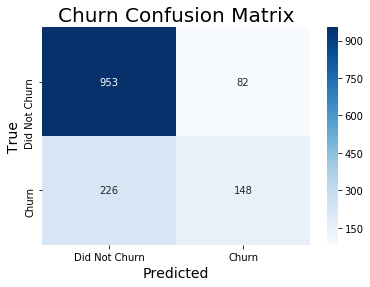

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1035
           1       0.64      0.40      0.49       374

    accuracy                           0.78      1409
   macro avg       0.73      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409

Confusion Matrix for Non-Selected Feature Dataset


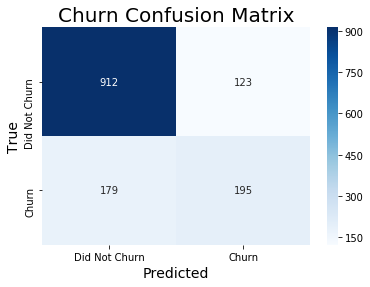

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.52      0.56       374

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [22]:
# Train on all training data and predict on hold-out set

# Fit baseline model to all selected feature training data
neurons = [n_cols, n_cols, n_cols]
model = create_baseline_model(n_units=n_cols, n_cols=n_cols)
_ = add_model_layers(model, neurons)
_ = finish_model(model)
model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=False)

# Fit baseline model to all non-selected feature training data
neurons = [n_cols_all, n_cols_all, n_cols_all]
model_all = create_baseline_model(n_units=n_cols_all, n_cols=n_cols_all)
_ = add_model_layers(model_all, neurons)
_ = finish_model(model_all)
model_all.fit(X_train_all, y_train_all, epochs=10, batch_size=5, verbose=False)

# Make predictions on testing data and print classification report
y_pred_small_batch_clean = activate_output(model.predict(X_test))
print('Confusion Matrix for Selected Feature Dataset')
_ = plot_results(y_test, y_pred_small_batch_clean)
cr_small_batch_clean = plot_results(y_test, y_pred_small_batch_clean, output_dict=True)

y_pred_small_batch_all = activate_output(model_all.predict(X_test_all))
print('Confusion Matrix for Non-Selected Feature Dataset')
_ = plot_results(y_test_all, y_pred_small_batch_all)
cr_small_batch_all = plot_results(y_test_all, y_pred_small_batch_all, output_dict=True)

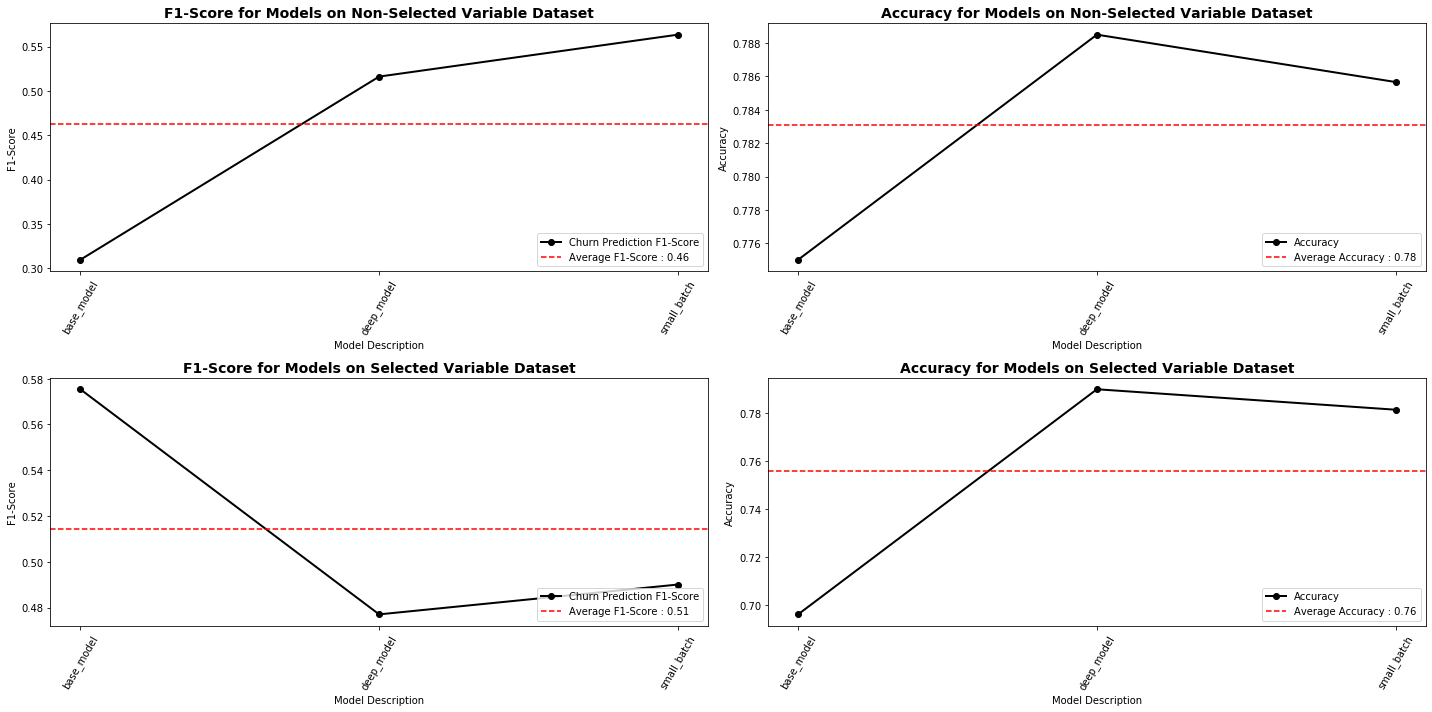

In [23]:
# Plot logistic regression results
f1_dict_all['small_batch'] = cr_small_batch_all['1']['f1-score']
acc_dict_all['small_batch'] = cr_small_batch_all['accuracy']
f1_dict_clean['small_batch'] = cr_small_batch_clean['1']['f1-score']
acc_dict_clean['small_batch'] = cr_small_batch_clean['accuracy']
_ = plot_f1_acc(f1_dict_all, acc_dict_all, f1_dict_clean, acc_dict_clean)

Halving the batch size from 10 to 5 shows improvement in model performance for both datasets. The non-selected feature dataset's F1 improved by nearly 3%, where most of the improvement comes from the recall increase from 43% to 52%. Looking at all the models that we've tested so far, the best recall comes from the baseline model on selected features, which was able to distinguish 78% of the users that ended up churning. So with added model complexity, it seems that the simplest model on the lesser amount of features is still outperforming all the models that we've created so far.

---

## Adjusting Hidden Layer Widths

For the next iteration of our model, we cn observe how the model performs on wider neural hidden layers. More neurons will be able to capture more relationships between features and may improve model performance. We'll start by using 50 neurons per layer before expanding the neural layer width to 100 neurons per layer.

### Hidden Layer Width - 50 Neurons / Layer

In [24]:
# Performs 5-Fold CV on the selected feature data using a 3 hidden layer model w 50 neurons/layer
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores= []

# Add 3 hidden layers with 50 neurons/layer
neurons = [50, 50, 50]
for train, test in kfold.split(X_train, y_train):
    # Model architecture
    model = create_baseline_model(n_units=n_cols, n_cols=n_cols)
    _ = add_model_layers(model, neurons)
    _ = finish_model(model)
    
    # Model Evaluation
    model.fit(X_train[train], y_train[train], epochs=10, batch_size=10, verbose=False)
    scores = model.evaluate(X_train[test], y_train[test], verbose=False)
    print(f"Accuracy on Selected Feature Dataset: {scores[1]*100:.2f}%")
    cv_scores.append(scores[1] * 100)
    
# Average model performance
print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")

Accuracy on Selected Feature Dataset: 76.31%
Accuracy on Selected Feature Dataset: 78.17%
Accuracy on Selected Feature Dataset: 78.79%
Accuracy on Selected Feature Dataset: 77.55%
Accuracy on Selected Feature Dataset: 78.15%
77.80% (+/- 0.84%)


In [25]:
# Performs 5-Fold CV on the non-selected feature data using a 3 hidden layer model w 50 neurons/layer
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores=[]

# Add 3 hidden layers with 50 neurons/layer
neurons = [50, 50, 50]
for train, test in kfold.split(X_train_all, y_train_all):
    # Model Architecture
    model = create_baseline_model(n_units=n_cols_all, n_cols=n_cols_all)
    _ = add_model_layers(model, neurons)
    _ = finish_model(model)
    
    model.fit(X_train_all[train], y_train_all[train], epochs=10, batch_size=10, verbose=False)
    scores = model.evaluate(X_train_all[test], y_train_all[test], verbose=False)
    print(f"Accuracy on Non-Selected Feature Dataset {scores[1]*100:.2f}%")
    cv_scores.append(scores[1] * 100)
print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")

Accuracy on Non-Selected Feature Dataset 78.44%
Accuracy on Non-Selected Feature Dataset 79.24%
Accuracy on Non-Selected Feature Dataset 79.41%
Accuracy on Non-Selected Feature Dataset 78.17%
Accuracy on Non-Selected Feature Dataset 79.66%
78.98% (+/- 0.58%)


Confusion Matrix for Selected Feature Dataset


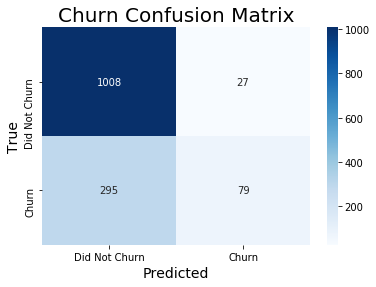

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1035
           1       0.75      0.21      0.33       374

    accuracy                           0.77      1409
   macro avg       0.76      0.59      0.60      1409
weighted avg       0.77      0.77      0.72      1409

Confusion Matrix for Non-Selected Feature Dataset


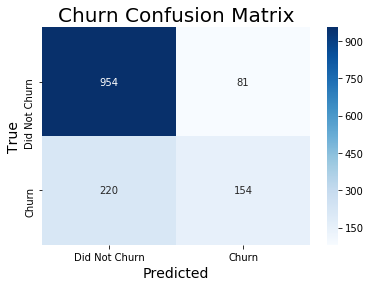

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1035
           1       0.66      0.41      0.51       374

    accuracy                           0.79      1409
   macro avg       0.73      0.67      0.68      1409
weighted avg       0.77      0.79      0.77      1409



In [26]:
# Train on all training data and predict on hold-out set

# Fit baseline model to all selected feature training data
neurons = [50, 50, 50]
model = create_baseline_model(n_units=n_cols, n_cols=n_cols)
_ = add_model_layers(model, neurons)
_ = finish_model(model)
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=False)

# Fit baseline model to all non-selected feature training data
neurons = [50, 50, 50]
model_all = create_baseline_model(n_units=n_cols_all, n_cols=n_cols_all)
_ = add_model_layers(model_all, neurons)
_ = finish_model(model_all)
model_all.fit(X_train_all, y_train_all, epochs=10, batch_size=10, verbose=False)

# Make predictions on testing data and print classification report
y_pred_50n_clean = activate_output(model.predict(X_test))
print('Confusion Matrix for Selected Feature Dataset')
_ = plot_results(y_test, y_pred_50n_clean)
cr_50n_clean = plot_results(y_test, y_pred_50n_clean, output_dict=True)

y_pred_50n_all = activate_output(model_all.predict(X_test_all))
print('Confusion Matrix for Non-Selected Feature Dataset')
_ = plot_results(y_test_all, y_pred_50n_all)
cr_50n_all = plot_results(y_test_all, y_pred_50n_all, output_dict=True)

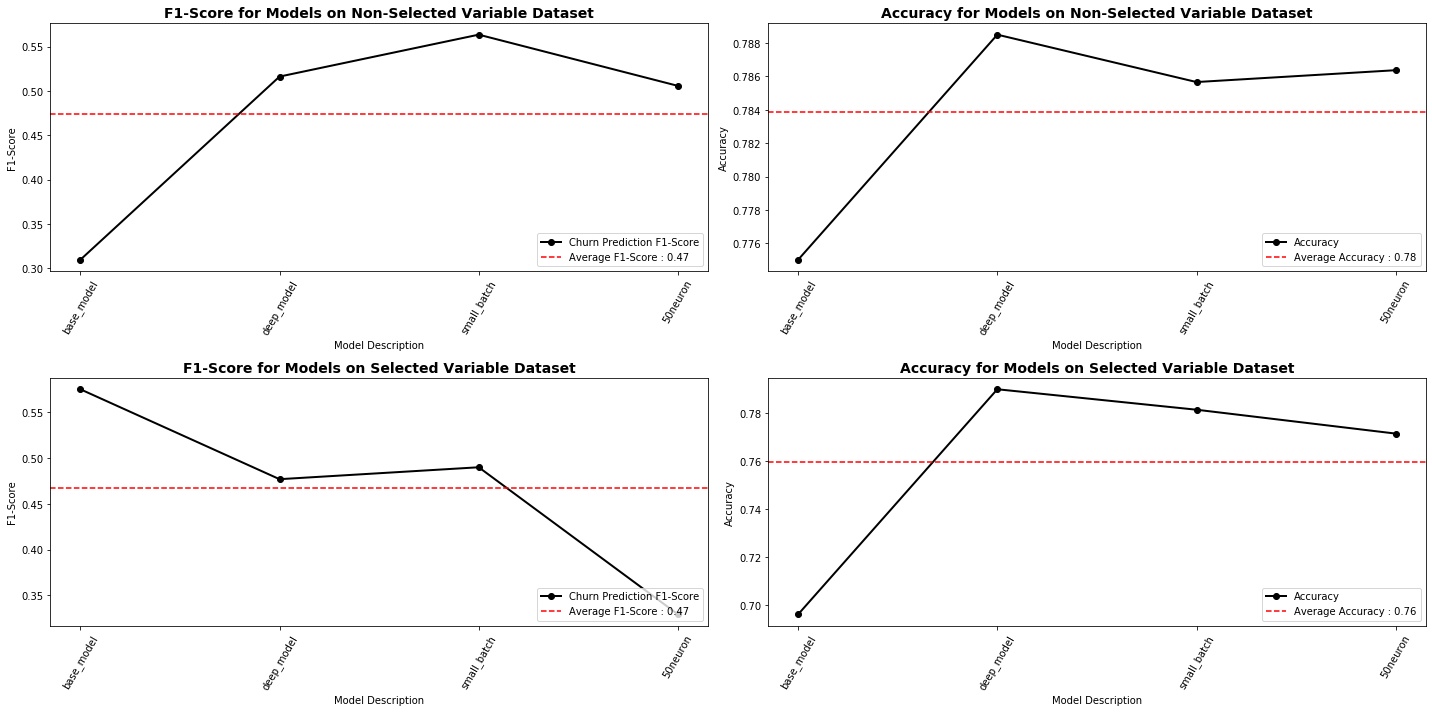

In [27]:
# Plot 50 neuron layer performance
f1_dict_all['50neuron'] = cr_50n_all['1']['f1-score']
acc_dict_all['50neuron'] = cr_50n_all['accuracy']
f1_dict_clean['50neuron'] = cr_50n_clean['1']['f1-score']
acc_dict_clean['50neuron'] = cr_50n_clean['accuracy']
_ = plot_f1_acc(f1_dict_all, acc_dict_all, f1_dict_clean, acc_dict_clean)

Adding more neurons per hidden layer made our model perform considerably worse than before. The F1 score on the selected feature dataset dipped even further from 50% to 34%. The recall for this model was 21%, which is much worse than simple guessing. Here, it's probably unwise to use wide neural layers since there's too much flexibility with greater hidden layer width which leads to larger variance on new predictions. 

What's interesting to note here is that the non-selected feature dataset that considers the entire user profile doesn't perform as badly by expanding hidden layer width as the selected feature dataset. The added model complexity benefits a wider dimensional dataset since there are more intricacies to keep track of in a larger dataset with more features than a smaller one. This shows that deeper and wider neural networks generally perform better on unreduced datasets.

---

### Hidden Layer Width - 100 Neurons / Layer

In [28]:
# Performs 5-Fold CV on the selected feature data using a 3 hidden layer model w 100 neurons/layer
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores= []

# Add a layer with n_cols number of neurons
neurons = [100, 100, 100]
for train, test in kfold.split(X_train, y_train):
    # Model architecture
    model = create_baseline_model(n_units=n_cols, n_cols=n_cols)
    _ = add_model_layers(model, neurons)
    _ = finish_model(model)
    
    # Model Evaluation
    model.fit(X_train[train], y_train[train], epochs=10, batch_size=10, verbose=False)
    scores = model.evaluate(X_train[test], y_train[test], verbose=False)
    print(f"Accuracy on Selected Feature Dataset: {scores[1]*100:.2f}%")
    cv_scores.append(scores[1] * 100)
    
# Average model performance
print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")

Accuracy on Selected Feature Dataset: 75.24%
Accuracy on Selected Feature Dataset: 79.50%
Accuracy on Selected Feature Dataset: 78.62%
Accuracy on Selected Feature Dataset: 77.99%
Accuracy on Selected Feature Dataset: 78.77%
78.03% (+/- 1.47%)


In [29]:
# Performs 5-Fold CV on the non-selected feature data using a 3 hidden layer model w 100 neurons/layer
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores=[]

neurons = [100, 100, 100]
for train, test in kfold.split(X_train_all, y_train_all):
    # Model Architecture
    model = create_baseline_model(n_units=n_cols_all, n_cols=n_cols_all)
    _ = add_model_layers(model, neurons)
    _ = finish_model(model)
    
    model.fit(X_train_all[train], y_train_all[train], epochs=10, batch_size=10, verbose=False)
    scores = model.evaluate(X_train_all[test], y_train_all[test], verbose=False)
    print(f"Accuracy on Non-Selected Feature Dataset {scores[1]*100:.2f}%")
    cv_scores.append(scores[1] * 100)
print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")

Accuracy on Non-Selected Feature Dataset 77.64%
Accuracy on Non-Selected Feature Dataset 79.33%
Accuracy on Non-Selected Feature Dataset 77.20%
Accuracy on Non-Selected Feature Dataset 77.20%
Accuracy on Non-Selected Feature Dataset 79.75%
78.22% (+/- 1.10%)


Confusion Matrix for Selected Feature Dataset


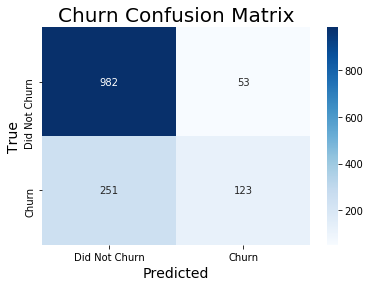

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1035
           1       0.70      0.33      0.45       374

    accuracy                           0.78      1409
   macro avg       0.75      0.64      0.66      1409
weighted avg       0.77      0.78      0.75      1409

Confusion Matrix for Non-Selected Feature Dataset


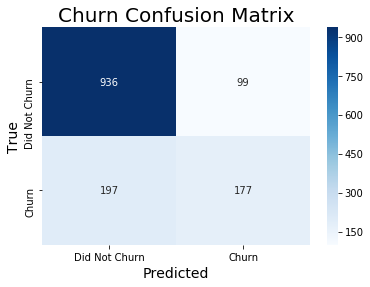

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [30]:
# Train on all training data and predict on hold-out set

# Fit baseline model to all selected feature training data
neurons = [100, 100, 100]
model = create_baseline_model(n_units=n_cols, n_cols=n_cols)
_ = add_model_layers(model, neurons)
_ = finish_model(model)
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=False)

# Fit baseline model to all non-selected feature training data
neurons = [100, 100, 100]
model_all = create_baseline_model(n_units=n_cols_all, n_cols=n_cols_all)
_ = add_model_layers(model_all, neurons)
_ = finish_model(model_all)
model_all.fit(X_train_all, y_train_all, epochs=10, batch_size=10, verbose=False)

# Make predictions on testing data and print classification report
y_pred_100n_clean = activate_output(model.predict(X_test))
print('Confusion Matrix for Selected Feature Dataset')
_ = plot_results(y_test, y_pred_100n_clean)
cr_100n_clean = plot_results(y_test, y_pred_100n_clean, output_dict=True)

y_pred_100n_all = activate_output(model_all.predict(X_test_all))
print('Confusion Matrix for Non-Selected Feature Dataset')
_ = plot_results(y_test_all, y_pred_100n_all)
cr_100n_all = plot_results(y_test_all, y_pred_100n_all, output_dict=True)

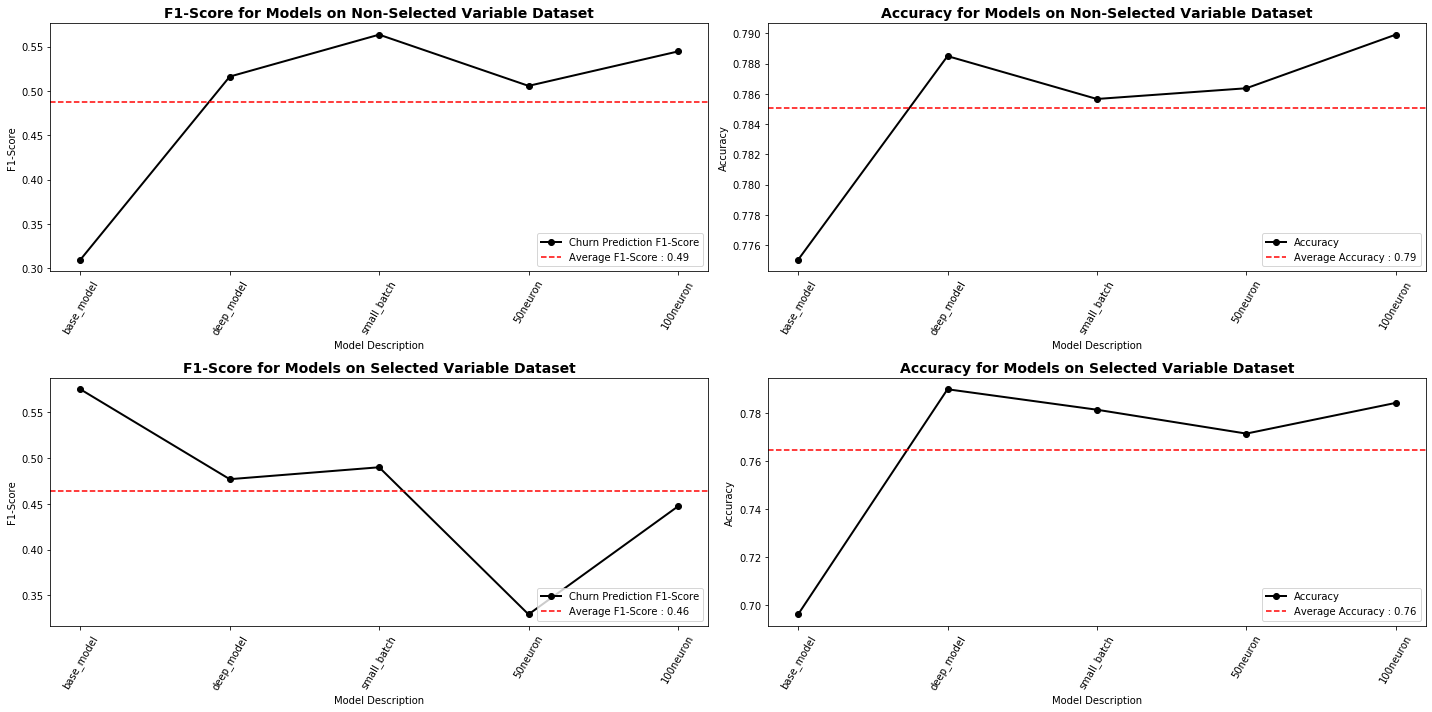

In [31]:
# Plot 100 neuron / layer performance
f1_dict_all['100neuron'] = cr_100n_all['1']['f1-score']
acc_dict_all['100neuron'] = cr_100n_all['accuracy']
f1_dict_clean['100neuron'] = cr_100n_clean['1']['f1-score']
acc_dict_clean['100neuron'] = cr_100n_clean['accuracy']
_ = plot_f1_acc(f1_dict_all, acc_dict_all, f1_dict_clean, acc_dict_clean)

Adding more neurons per hidden layer further expounds the idea that added model complexity benefits the more feature rich dataset. While there were marginal gains in F1 score for both datasets, neither are able to reach the performance of using a random forest classifier on the non-selected feature dataset. 

Using a large number of neurons to influence the outcome of the prediction might seem like a good idea at first, but the additional neurons have the affect of observing relationships between the data points that don't actually matter in making a prediction. This behavior adds noise to the prediction and causes the model to perform worse when using more neurons to predict with.

---

## Adding More Hidden Layers

### 5 Hidden Layers

Our last effort in modeling our data will come from using a 5 layer deep neural network. At this point, it would be good to see how an even deeper model might perform on the dataset to see if there can still be performance gains from using a neural network.

In [32]:
# Performs 5-Fold CV on the selected feature data using a 5 hidden layer model
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores= []

# Add a layer with n_cols number of neurons
neurons = [n_cols, n_cols, n_cols, n_cols, n_cols]
for train, test in kfold.split(X_train, y_train):
    # Model architecture
    model = create_baseline_model(n_units=n_cols, n_cols=n_cols)
    _ = add_model_layers(model, neurons)
    _ = finish_model(model)
    
    # Model Evaluation
    model.fit(X_train[train], y_train[train], epochs=10, batch_size=10, verbose=False)
    scores = model.evaluate(X_train[test], y_train[test], verbose=False)
    print(f"Accuracy on Selected Feature Dataset: {scores[1]*100:.2f}%")
    cv_scores.append(scores[1] * 100)
    
# Average model performance
print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")

Accuracy on Selected Feature Dataset: 77.11%
Accuracy on Selected Feature Dataset: 79.06%
Accuracy on Selected Feature Dataset: 78.62%
Accuracy on Selected Feature Dataset: 79.15%
Accuracy on Selected Feature Dataset: 77.62%
78.31% (+/- 0.81%)


In [33]:
# Performs 5-Fold CV on the selected feature data using a 5 hidden layer model
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores=[]

neurons = [n_cols_all, n_cols_all, n_cols_all, n_cols_all, n_cols_all]
for train, test in kfold.split(X_train_all, y_train_all):
    # Model Architecture
    model = create_baseline_model(n_units=n_cols_all, n_cols=n_cols_all)
    _ = add_model_layers(model, neurons)
    _ = finish_model(model)
    
    model.fit(X_train_all[train], y_train_all[train], epochs=10, batch_size=10, verbose=False)
    scores = model.evaluate(X_train_all[test], y_train_all[test], verbose=False)
    print(f"Accuracy on Non-Selected Feature Dataset {scores[1]*100:.2f}%")
    cv_scores.append(scores[1] * 100)
print(f"{np.mean(cv_scores):.2f}% (+/- {np.std(cv_scores):.2f}%)")

Accuracy on Non-Selected Feature Dataset 77.11%
Accuracy on Non-Selected Feature Dataset 80.21%
Accuracy on Non-Selected Feature Dataset 78.88%
Accuracy on Non-Selected Feature Dataset 79.06%
Accuracy on Non-Selected Feature Dataset 79.66%
78.98% (+/- 1.05%)


Confusion Matrix for Selected Feature Dataset


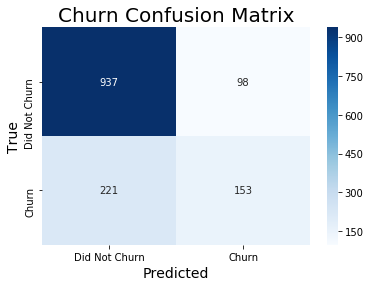

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1035
           1       0.61      0.41      0.49       374

    accuracy                           0.77      1409
   macro avg       0.71      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409

Confusion Matrix for Non-Selected Feature Dataset


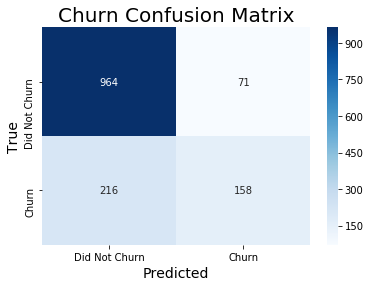

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1035
           1       0.69      0.42      0.52       374

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



In [34]:
# Train on all training data and predict on hold-out set

# Fit baseline model to all selected feature training data
neurons = [n_cols, n_cols, n_cols, n_cols, n_cols]
model = create_baseline_model(n_units=n_cols, n_cols=n_cols)
_ = add_model_layers(model, neurons)
_ = finish_model(model)
model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=False)

# Fit baseline model to all non-selected feature training data
neurons = [n_cols_all, n_cols_all, n_cols_all, n_cols_all, n_cols_all]
model_all = create_baseline_model(n_units=n_cols_all, n_cols=n_cols_all)
_ = add_model_layers(model_all, neurons)
_ = finish_model(model_all)
model_all.fit(X_train_all, y_train_all, epochs=10, batch_size=10, verbose=False)

# Make predictions on testing data and print classification report
y_pred_50n_5l_clean = activate_output(model.predict(X_test))
print('Confusion Matrix for Selected Feature Dataset')
_ = plot_results(y_test, y_pred_50n_5l_clean)
cr_5l_clean = plot_results(y_test, y_pred_50n_5l_clean, output_dict=True)

y_pred_50n_5l_all = activate_output(model_all.predict(X_test_all))
print('Confusion Matrix for Non-Selected Feature Dataset')
_ = plot_results(y_test_all, y_pred_50n_5l_all)
cr_5l_all = plot_results(y_test_all, y_pred_50n_5l_all, output_dict=True)

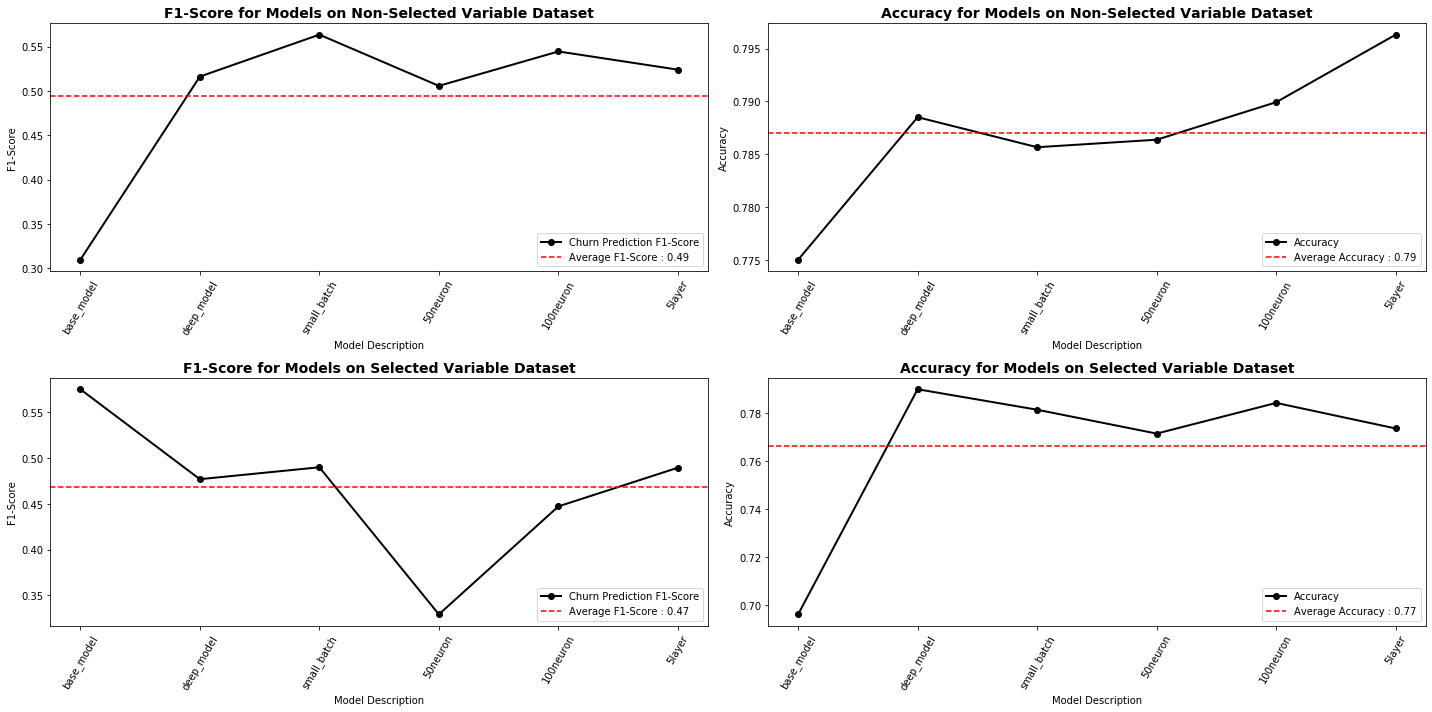

In [35]:
# Plot 5 layer 50 neuron performance results
f1_dict_all['5layer'] = cr_5l_all['1']['f1-score']
acc_dict_all['5layer'] = cr_5l_all['accuracy']
f1_dict_clean['5layer'] = cr_5l_clean['1']['f1-score']
acc_dict_clean['5layer'] = cr_5l_clean['accuracy']
_ = plot_f1_acc(f1_dict_all, acc_dict_all, f1_dict_clean, acc_dict_clean)

---

With a 5 layer deep neural network, we can see that, unfortunately, the performance of the neural network model still doesn't perform as well as the 60% F1 80% accuracy random forest classifier. The performance of these neural network models seem to be capped by the amount of data we were provided by Telco to solve the problem. The overall accuracy of the models that we tested for this project seems to be capped at around 80%. The F1 score reaches a maximum of 60% which makes sense since we can only train on around 1500 users that churned. Every individual has their unique profile and the model would need to train on more users to get a better understanding of the underlying trends common among users that churned.

Overall, it was a good exercise to evaluate the performance of a deep neural network, but the dataset simply lacks the number of observations and features needed to warrant great performance from a predictive model, especially a neural network. Neural networks are great at finding nuanced observations across thousands of samples with thousands of variables. From my last project, I analyzed deep learning based facial recognition and generated outstanding results (0.9975 F1 on 0.9975 accuracy) using thousands of face images with size 216x216 pixels. Every pixel counts as its own feature for that dataset and the convolutional neural network was able to perform near perfectly.

However, the Telco dataset only offers 43 features with 7000 observations. The performance of the neural network was limited by the lack of data provided from the Telco company. For this predictive modeling task, it would be best to use a random forest classifier since its a generally low bias and low variance classifier that performs much better when given more data.

Although the logistic classifier was good for this specific dataset, if the Telco company wants to extend their predictive analytics further, it would be best to use the more robust random forest classifier.

Thanks for following this project about deep learning classification. Although it wasn't the appropriate tool given this dataset, it's still interesting to note that given limited data, a deep learning classifier can still manage similar performance to that of random forest classification. If you enjoyed this content, please follow me on <a href="https://github.com/aldenmchico">GitHub</a> or <a href="https://www.linkedin.com/in/alden-chico/">LinkedIn</a>. Thanks again and I'll see you all for the next project.